<a href="https://colab.research.google.com/github/tricucdu/bai-tap-ai/blob/bai-tap-ann/cnn_money.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout,Flatten,Conv2D,MaxPooling2D,Input
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

train_dir='/content/money_data'
img_width,img_height=128,128
batch_size=64
train_datagen=ImageDataGenerator(rescale=1./255,
                                  rotation_range=30,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True,
                                  fill_mode='nearest')
train_generator=train_datagen.flow_from_directory(train_dir,
                                                  target_size=(img_width,img_height),
                                                  batch_size=batch_size,
                                                  class_mode='categorical')
model=Sequential([
    Conv2D(32,(3,3),activation='relu',input_shape=(img_width,img_height,3)),
    MaxPooling2D(2,2),
    Conv2D(64,(3,3),activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128,(3,3),activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128,activation='relu'),
    Dropout(0.5),
    Dense(4,activation='softmax')
])
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model.summary()
history = model.fit(
    train_generator,
    epochs=20,
    steps_per_epoch=train_generator.samples // batch_size,
    verbose=1
)
model.save("money_cnn_model.h5")

Found 4004 images belonging to 4 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │             516 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,305,156 (12.61 MB)

 Trainable params: 3,305,156 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 43s 596ms/step - accuracy: 0.4968 - loss: 0.9989
Epoch 2/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 183us/step - accuracy: 0.7812 - loss: 0.3958 
Epoch 3/20


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


62/62 ━━━━━━━━━━━━━━━━━━━━ 75s 566ms/step - accuracy: 0.7770 - loss: 0.4104
Epoch 4/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 195us/step - accuracy: 0.9062 - loss: 0.2535 
Epoch 5/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 40s 565ms/step - accuracy: 0.8904 - loss: 0.3023
Epoch 6/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 187us/step - accuracy: 0.9531 - loss: 0.1487 
Epoch 7/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 41s 568ms/step - accuracy: 0.9715 - loss: 0.0939
Epoch 8/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 190us/step - accuracy: 1.0000 - loss: 0.0150 
Epoch 9/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 40s 560ms/step - accuracy: 0.9226 - loss: 0.2597
Epoch 10/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 177us/step - accuracy: 0.9844 - loss: 0.0482 
Epoch 11/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 40s 556ms/step - accuracy: 0.9785 - loss: 0.0864
Epoch 12/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 184us/step - accuracy: 1.0000 - loss: 0.0132 
Epoch 13/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 34s 547ms/step - accuracy: 0.9833 - loss: 0.0555
Epoch 14/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 255us/st

Found 4004 images belonging to 4 classes.


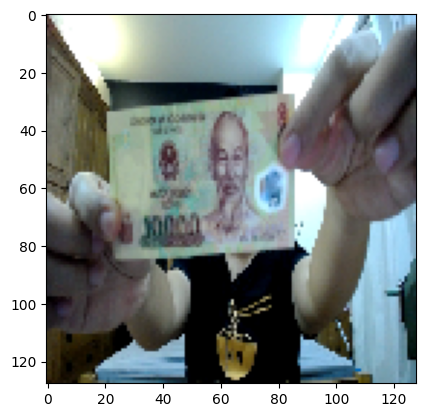

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 519ms/step
10000


In [6]:
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_dir='/content/money_data'
img_width,img_height=128,128
batch_size=64
train_datagen=ImageDataGenerator(rescale=1./255,
                                  rotation_range=30,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True,
                                  fill_mode='nearest')
train_generator=train_datagen.flow_from_directory(train_dir,
                                                  target_size=(img_width,img_height),
                                                  batch_size=batch_size,
                                                  class_mode='categorical')


model = load_model("/content/money_cnn_model.h5")
path='/content/drive/MyDrive/Money Data/data/10000/100.png'
img=load_img(path,target_size=(128,128))
plt.imshow(img)
plt.show()
img_array=img_to_array(img)
img_array=img_array/255.0
img_array = img_array.reshape(1,128,128,3)
prediction=np.argmax(model.predict(img_array))
class_labels={v:k for k,v in train_generator.class_indices.items()}
person_name=class_labels[prediction]
print(person_name)

Found 4004 images belonging to 4 classes.


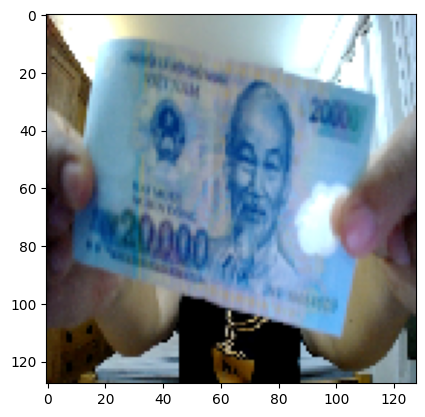

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 365ms/step
20000


In [7]:
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_dir='/content/money_data'
img_width,img_height=128,128
batch_size=64
train_datagen=ImageDataGenerator(rescale=1./255,
                                  rotation_range=30,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True,
                                  fill_mode='nearest')
train_generator=train_datagen.flow_from_directory(train_dir,
                                                  target_size=(img_width,img_height),
                                                  batch_size=batch_size,
                                                  class_mode='categorical')


model = load_model("/content/money_cnn_model.h5")
path='/content/drive/MyDrive/Money Data/data/20000/100.png'
img=load_img(path,target_size=(128,128))
plt.imshow(img)
plt.show()
img_array=img_to_array(img)
img_array=img_array/255.0
img_array = img_array.reshape(1,128,128,3)
prediction=np.argmax(model.predict(img_array))
class_labels={v:k for k,v in train_generator.class_indices.items()}
person_name=class_labels[prediction]
print(person_name)

Found 4004 images belonging to 4 classes.


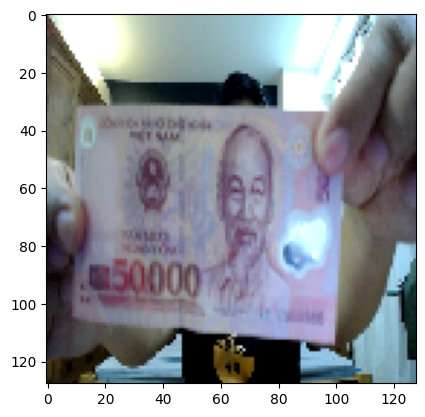

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 362ms/step
50000


In [8]:
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_dir='/content/money_data'
img_width,img_height=128,128
batch_size=64
train_datagen=ImageDataGenerator(rescale=1./255,
                                  rotation_range=30,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True,
                                  fill_mode='nearest')
train_generator=train_datagen.flow_from_directory(train_dir,
                                                  target_size=(img_width,img_height),
                                                  batch_size=batch_size,
                                                  class_mode='categorical')


model = load_model("/content/money_cnn_model.h5")
path='/content/drive/MyDrive/Money Data/data/50000/100.png'
img=load_img(path,target_size=(128,128))
plt.imshow(img)
plt.show()
img_array=img_to_array(img)
img_array=img_array/255.0
img_array = img_array.reshape(1,128,128,3)
prediction=np.argmax(model.predict(img_array))
class_labels={v:k for k,v in train_generator.class_indices.items()}
person_name=class_labels[prediction]
print(person_name)